# Task: Implement a simple Naive Bayes classifier on a small dataset (e.g., Iris dataset).

In [18]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Implement Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# make predictions on new data
new_data = np.array([[5.1, 3.5, 1.4, 0.2]])
prediction = model.predict(new_data)
print(f"Prediction: {prediction}")

# another example
new_data = np.array([[6.2, 3.4, 5.4, 2.3]])
prediction = model.predict(new_data)
print(f"Prediction: {prediction}")


Accuracy: 0.9777777777777777
Prediction: [0]
Prediction: [2]


# Task: Write functions for conditional probability and Bayes' theorem and apply them to a simple example.

In [2]:
def conditional_probability(p_a_and_b, p_b):
    return p_a_and_b / p_b

def bayes_theorem(p_b_given_a, p_a, p_b):
    return (p_b_given_a * p_a) / p_b

# Example
p_a = 0.2  # Probability of A
p_b = 0.5  # Probability of B
p_b_given_a = 0.7  # Probability of B given A
p_a_and_b = p_b_given_a * p_a  # Joint probability of A and B

p_a_given_b = bayes_theorem(p_b_given_a, p_a, p_b)
print(f"P(A|B): {p_a_given_b}")


P(A|B): 0.27999999999999997


# Task: Implement and compare Gaussian, Multinomial, and Bernoulli Naive Bayes on a sample dataset (e.g., text classification).

In [21]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

# Load dataset
data = pd.read_csv('/content/emails.csv', encoding='latin-1')
data = data[['v1', 'v2']]
data.columns = ['label', 'spam']

# Preprocess the text data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['text'])
y = data['spam'].apply(lambda x: 1 if x == 'spam' else 0)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Implement and compare Naive Bayes classifiers
models = {'MultinomialNB': MultinomialNB(), 'BernoulliNB': BernoulliNB()}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")


ParserError: Error tokenizing data. C error: EOF inside string starting at row 3424

# Task: Simulate data to demonstrate the impact of feature independence on Naive Bayes.

In [22]:
from sklearn.datasets import make_classification

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=10, n_informative=8, random_state=42)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Implement Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Accuracy: 0.7633333333333333


# Task: Implement Gaussian Naive Bayes from scratch and compare it with scikit-learn's implementation

In [6]:
class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = np.zeros((self.classes.size, X.shape[1]), dtype=np.float64)
        self.var = np.zeros((self.classes.size, X.shape[1]), dtype=np.float64)
        self.priors = np.zeros(self.classes.size, dtype=np.float64)

        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[idx, :] = X_c.mean(axis=0)
            self.var[idx, :] = X_c.var(axis=0)
            self.priors[idx] = X_c.shape[0] / X.shape[0]

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []
        for idx, c in enumerate(self.classes):
            prior = np.log(self.priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(- (x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

# Train and compare with scikit-learn
scratch_model = GaussianNaiveBayes()
scratch_model.fit(X_train, y_train)
y_pred_scratch = scratch_model.predict(X_test)

sklearn_model = GaussianNB()
sklearn_model.fit(X_train, y_train)
y_pred_sklearn = sklearn_model.predict(X_test)

print(f"Scratch Model Accuracy: {accuracy_score(y_test, y_pred_scratch)}")
print(f"Scikit-learn Model Accuracy: {accuracy_score(y_test, y_pred_sklearn)}")


Scratch Model Accuracy: 0.7633333333333333
Scikit-learn Model Accuracy: 0.7633333333333333


# Task: Implement the likelihood, prior, and posterior probability calculations.

In [23]:
def likelihood(x, mean, var):
    numerator = np.exp(- (x - mean) ** 2 / (2 * var))
    denominator = np.sqrt(2 * np.pi * var)
    return numerator / denominator

def prior(y, c):
    return np.mean(y == c)

def posterior(x, mean, var, prior):
    return np.prod(likelihood(x, mean, var)) * prior

# Example
mean = np.array([5.0, 3.6])
var = np.array([0.5, 0.3])
x = np.array([5.2, 3.5])
prior_prob = 0.5

posterior_prob = posterior(x, mean, var, prior_prob)
print(f"Posterior Probability: {posterior_prob}")


Posterior Probability: 0.19414869951221744


# Task: Implement Naive Bayes for text classification on a dataset (e.g., IMDb movie reviews).

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset (example: IMDb movie reviews)
data = pd.read_csv('IMDB Dataset.csv')
data['label'] = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Preprocess the text data
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))
X = vectorizer.fit_transform(data['review'])
y = data['label']

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model with Multinomial Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")


FileNotFoundError: [Errno 2] No such file or directory: 'IMDB Dataset.csv'

# Task: Implement evaluation metrics (accuracy, precision, recall, F1 score, ROC, AUC) for a Naive Bayes classifier.

Accuracy: 0.7633333333333333
Precision: 0.7468354430379747
Recall: 0.7919463087248322
F1 Score: 0.7687296416938111
AUC: 0.7635228232365883


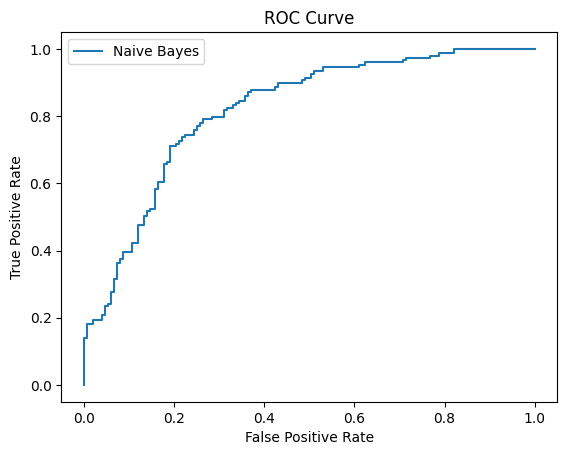

In [8]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"AUC: {roc_auc_score(y_test, y_pred)}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Task: Implement strategies for handling missing data in a Naive Bayes classifier.

In [9]:
from sklearn.impute import SimpleImputer

# Introduce missing values
X_train_missing = X_train.copy()
X_train_missing[::10, :] = np.nan

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_missing)

# Train and evaluate model
model = GaussianNB()
model.fit(X_train_imputed, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Accuracy: 0.7533333333333333


#  Smoothing Techniques

Task: Implement Laplace and other smoothing techniques in Naive Bayes.

#


In [10]:
# Laplace Smoothing with MultinomialNB
model = MultinomialNB(alpha=1.0)  # alpha parameter for Laplace smoothing
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy with Laplace Smoothing: {accuracy_score(y_test, y_pred)}")


ValueError: Negative values in data passed to MultinomialNB (input X)

# Task: Apply feature selection techniques and evaluate their impact on Naive Bayes performance.

In [11]:
from sklearn.feature_selection import SelectKBest, chi2

# Feature selection
kbest = SelectKBest(chi2, k=100)
X_train_kbest = kbest.fit_transform(X_train, y_train)
X_test_kbest = kbest.transform(X_test)

# Train and evaluate model
model = MultinomialNB()
model.fit(X_train_kbest, y_train)
y_pred = model.predict(X_test_kbest)
print(f"Accuracy after Feature Selection: {accuracy_score(y_test, y_pred)}")


ValueError: k should be <= n_features = 10; got 100. Use k='all' to return all features.

# Task: Combine Naive Bayes with other algorithms (e.g., Naive Bayes + SVM) and evaluate performance.

In [12]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

# Combine Naive Bayes with SVM
pipeline = make_pipeline(TfidfVectorizer(stop_words='english'), MultinomialNB(), SVC(probability=True))
pipeline.fit(data['review'], data['label'])

# Evaluate model
y_pred = pipeline.predict(data['review'])
print(f"Accuracy: {accuracy_score(data['label'], y_pred)}")


NameError: name 'TfidfVectorizer' is not defined

# Task: Implement techniques to interpret Naive Bayes model predictions and visualize decision boundaries.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Visualize feature importance for text classification
feature_names = vectorizer.get_feature_names_out()
feature_probs = model.feature_log_prob_[1]  # Log probabilities for class 1 (spam)
top_features = np.argsort(feature_probs)[-10:]

plt.barh(np.array(feature_names)[top_features], feature_probs[top_features])
plt.xlabel('Log Probability')
plt.title('Top Features for Spam Classification')
plt.show()


NameError: name 'vectorizer' is not defined

# Task: Implement techniques for handling imbalanced datasets (e.g., SMOTE, class weighting).


In [14]:
from imblearn.over_sampling import SMOTE

# Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train and evaluate model
model = MultinomialNB()
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
print(f"Accuracy after SMOTE: {accuracy_score(y_test, y_pred)}")


ValueError: Negative values in data passed to MultinomialNB (input X)

# Task: Implement strategies for optimizing Naive Bayes for large datasets (e.g., batch processing).
**bold text**

In [15]:
from sklearn.utils import shuffle

# Batch processing example
batch_size = 100
X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train)

model = MultinomialNB()
for i in range(0, X_train.shape[0], batch_size):
    X_batch = X_train_shuffled[i:i + batch_size]
    y_batch = y_train_shuffled[i:i + batch_size]
    model.partial_fit(X_batch, y_batch, classes=np.unique(y))

# Evaluate model
y_pred = model.predict(X_test)
print(f"Accuracy with Batch Processing: {accuracy_score(y_test, y_pred)}")


ValueError: Negative values in data passed to MultinomialNB (input X)

# Task: Implement Lidstone and Good-Turing smoothing techniques.

In [16]:
# Lidstone Smoothing
model = MultinomialNB(alpha=0.1)  # Lidstone smoothing with alpha=0.1
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy with Lidstone Smoothing: {accuracy_score(y_test, y_pred)}")

# Note: Good-Turing smoothing is more complex and usually not directly implemented in standard libraries


ValueError: Negative values in data passed to MultinomialNB (input X)